In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import py_key
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly
import plotly.io as pio
from matplotlib import pyplot as plt
from scipy.stats import linregress

from sklearn.metrics import r2_score

In [2]:
# Save original data as a variable to be read 
data_to_load = "Data_RChounoune/state_clean_data.csv"

In [3]:
# Read our Data file with the pandas library
data_df = pd.read_csv(data_to_load)
data_df.head()
data_df.columns

Index(['State', 'Unemployment_Num', 'Unemployment_Den', 'Unemployment_Perc',
       'Uninsured_Num', 'Uninsured_Den', 'Uninsured_Perc',
       'Uninsured_Adults_Num', 'Uninsured_Adults_Den', 'Uninsured_Adults_Perc',
       'Uninsured_Children_Num', 'Uninsured_Children_Den',
       'Uninsured_Children_Perc', 'Diabetes_Prevalence_Num',
       'Diabetes_Prevalence_Den', 'Diabetes_Prevalence_Perc',
       'HIV_Prevalence_Num', 'HIV_Prevalence_Den', 'HIV_Prevalence_Perc',
       'Adult_Obesity_Num', 'Adult_Obesity_Den', 'Adult_Obesity_Perc',
       'Violent_Crimes_Num', 'Violent_Crimes_Den', 'Violent_Crimes_Perc',
       'Injury_Deaths_Num', 'Injury_Deaths_Den', 'Injury_Deaths_Perc',
       'Homicides_Num', 'Homicides_Den', 'Homicides_Perc',
       'Firearms_Fatality_Num', 'Firearms_Fatality_Den',
       'Firearms_Fatalities_Perc', 'Drugs_Overdose_Death_Num',
       'Drugs_Overdose_Death_Den', 'Drugs_Overdose_Deaths_Perc',
       'Premature_Deaths_Num', 'Premature_Deaths_Den', 'Premature_De

In [4]:
outcome_df = pd.DataFrame(data_df)
outcome_df.head()

,State,Unemployment_Num,Unemployment_Den,Unemployment_Perc,Uninsured_Num,Uninsured_Den,Uninsured_Perc,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Adults_Perc,...,Firearms_Fatalities_Perc,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Drugs_Overdose_Deaths_Perc,Premature_Deaths_Num,Premature_Deaths_Den,Premature_Deaths_Perc,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Low_Birth_Weight_Perc
0,AK,51956.0,725572.0,0.071607,201574.0,1299028.0,0.155173,163858.0,929122.0,0.176358,...,0.000226,743.0,3995795.0,0.000186,16598.0,4269456.0,0.003888,9168.0,155451.0,0.058977
1,AL,190684.0,4336896.0,0.043968,855944.0,7946156.0,0.107718,802088.0,5791254.0,0.138500,...,0.000198,4512.0,27416637.0,0.000165,160880.0,27273632.0,0.005899,83790.0,825884.0,0.101455
2,AR,99670.0,2708544.0,0.036798,456684.0,4855014.0,0.094064,403944.0,3474804.0,0.116249,...,0.000180,2267.0,15808357.0,0.000143,95680.0,16718408.0,0.005723,47988.0,535980.0,0.089533
3,AZ,322628.0,6625442.0,0.048695,1339638.0,11226354.0,0.119330,1104656.0,8018912.0,0.137756,...,0.000149,8370.0,41522215.0,0.000202,156792.0,38639850.0,0.004058,84784.0,1191676.0,0.071147
4,CA,1837766.0,38623920.0,0.047581,5574610.0,66523356.0,0.083799,5053256.0,48571872.0,0.104037,...,0.000079,28335.0,235691015.0,0.000120,687182.0,222305892.0,0.003091,469061.0,6909720.0,0.067884


In [5]:
outcome_data = outcome_df[["State", "Unemployment_Perc","Premature_Deaths_Perc","Low_Birth_Weight_Perc"]]

In [6]:
# Creating axis for list of states
x_axis1 =[]
for i in outcome_data['State']:
    x_axis1.append(i)
x_axis1 =np.array(x_axis1)

In [7]:
# x_axis2 for Unemployment
x_axis2 =[]
for i in outcome_data['Unemployment_Perc']:
    x_axis2.append(i*100)
x_axis2 =np.array(x_axis2)

In [8]:
# y_axis for Premature Deaths
y_axis1 =[]
for i in outcome_data['Premature_Deaths_Perc']:
    y_axis1.append(i*100)
y_axis1 =np.array(y_axis1)


In [9]:
unemp_prem_corr = outcome_data.corr().loc['Unemployment_Perc','Premature_Deaths_Perc']
unemp_prem_corr = round((unemp_prem_corr),2)

In [10]:
# y_axis2 for Low Birth
y_axis2 =[]
for i in outcome_data['Low_Birth_Weight_Perc']:
    y_axis2.append(i*100)
y_axis2 =np.array(y_axis2)

In [11]:
unemp_lowbw_corr = outcome_data.corr().loc['Unemployment_Perc','Low_Birth_Weight_Perc']
unemp_lowbw_corr = round((unemp_lowbw_corr),2)

<IPython.core.display.Javascript object>


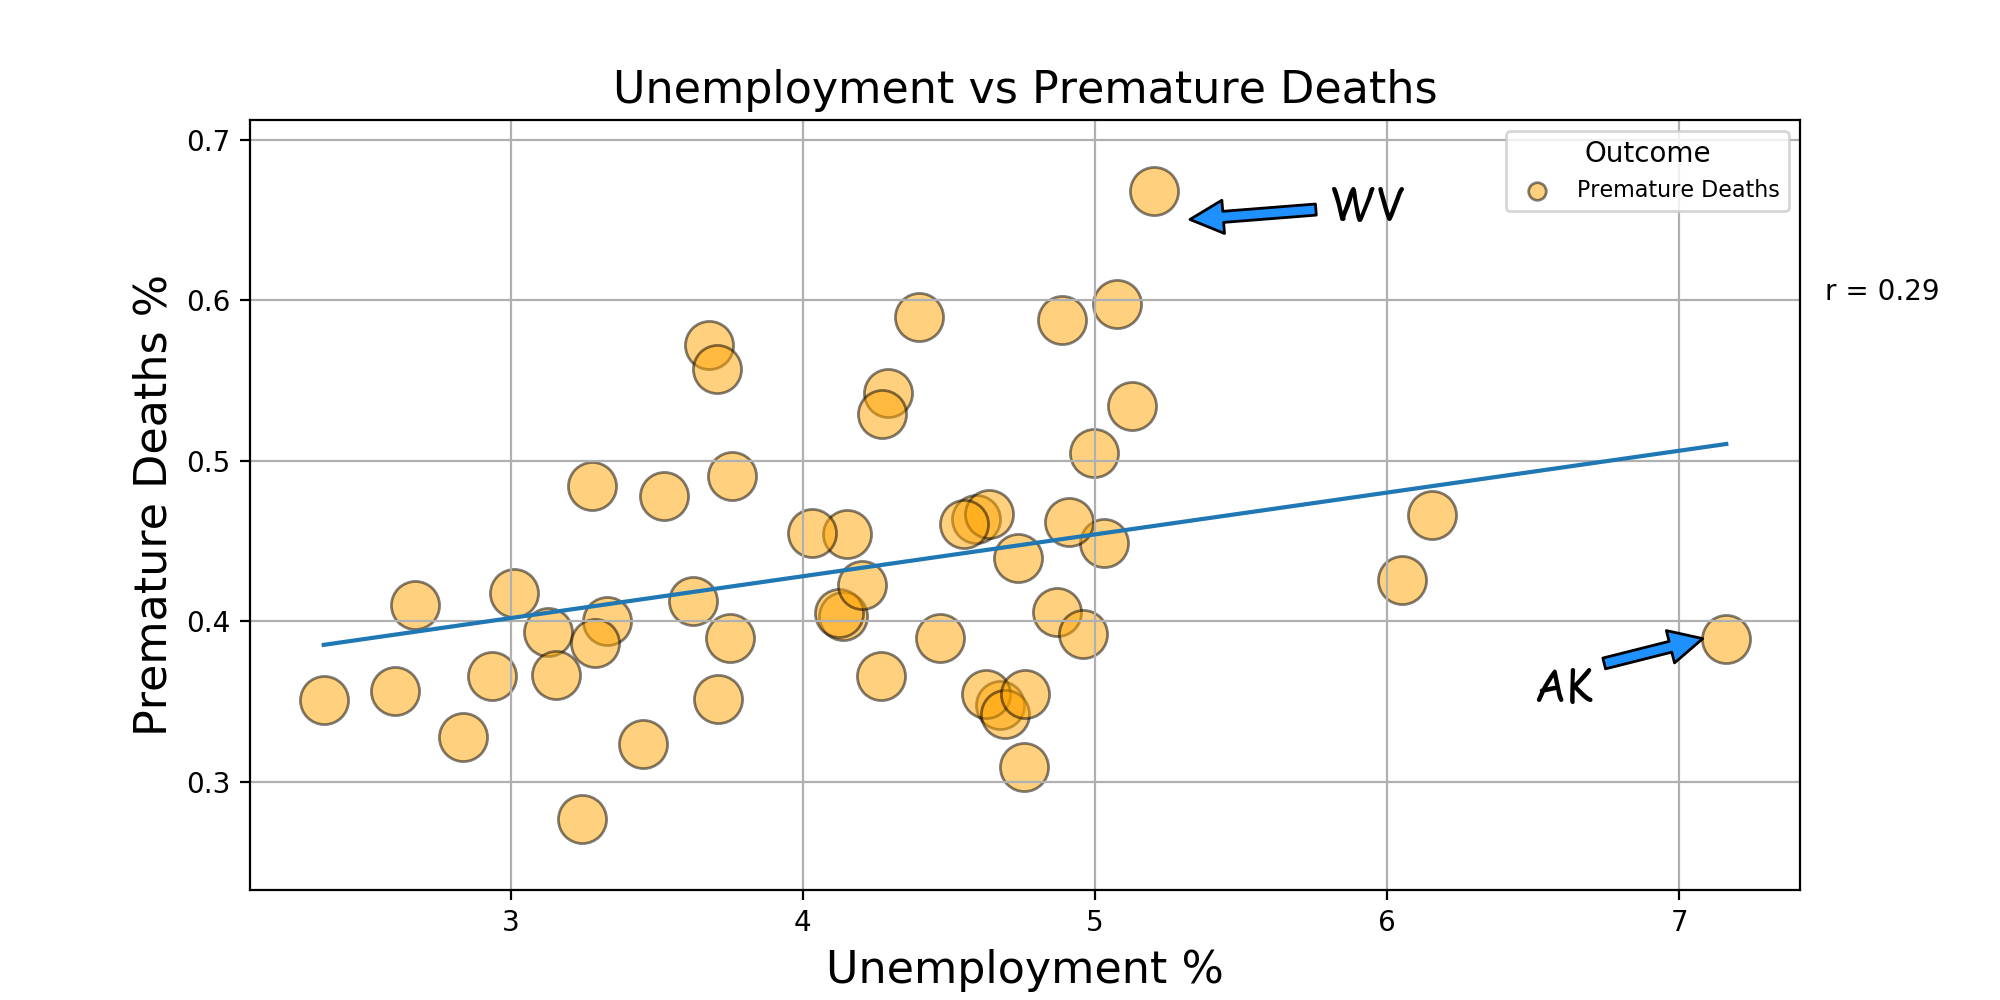

In [12]:
# Plotting Unemployment vs Premature scatter plot
plt.figure(figsize=(10,5))
y_limit = 0.001
x_limit = 0.1
z= np.unique(x_axis1)

# Building Scatter Plot
plt.scatter(x_axis2, y_axis1,s=300, label = "Premature Deaths", color=["orange"], edgecolor="black", alpha = 0.5, marker="o")

# Annotating outliers
plt.annotate('AK',fontname="Comic Sans MS", fontsize =16, xy=(7.1, 0.39), xytext=(6.5, 0.35),
            arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
plt.annotate('WV',fontname="Comic Sans MS", fontsize =16, xy=(5.3, 0.65), xytext=(5.8, 0.65),
            arrowprops=dict(facecolor='dodgerblue', shrink=0.05))

# Annotating correlation
plt.text(7.5,0.6, f"r = {unemp_prem_corr}", fontsize = 10)


# Best fitted line
plt.plot(np.unique(x_axis2), np.poly1d(np.polyfit(x_axis2, y_axis1, 1))(np.unique(x_axis2)))

plt.grid()

# Create a legend
legend = plt.legend(fontsize = 8, title= "Outcome", loc="best") 
legend.legendHandles[0]._sizes = [40]

# Plot labels
plt.title("Unemployment vs Premature Deaths", size=16)
plt.xlabel("Unemployment %", size=16)
plt.ylabel("Premature Deaths %", size=16)

plt.show()

plt.savefig("Images_RChounoune/Unemployment vs Premature Deaths")

<IPython.core.display.Javascript object>


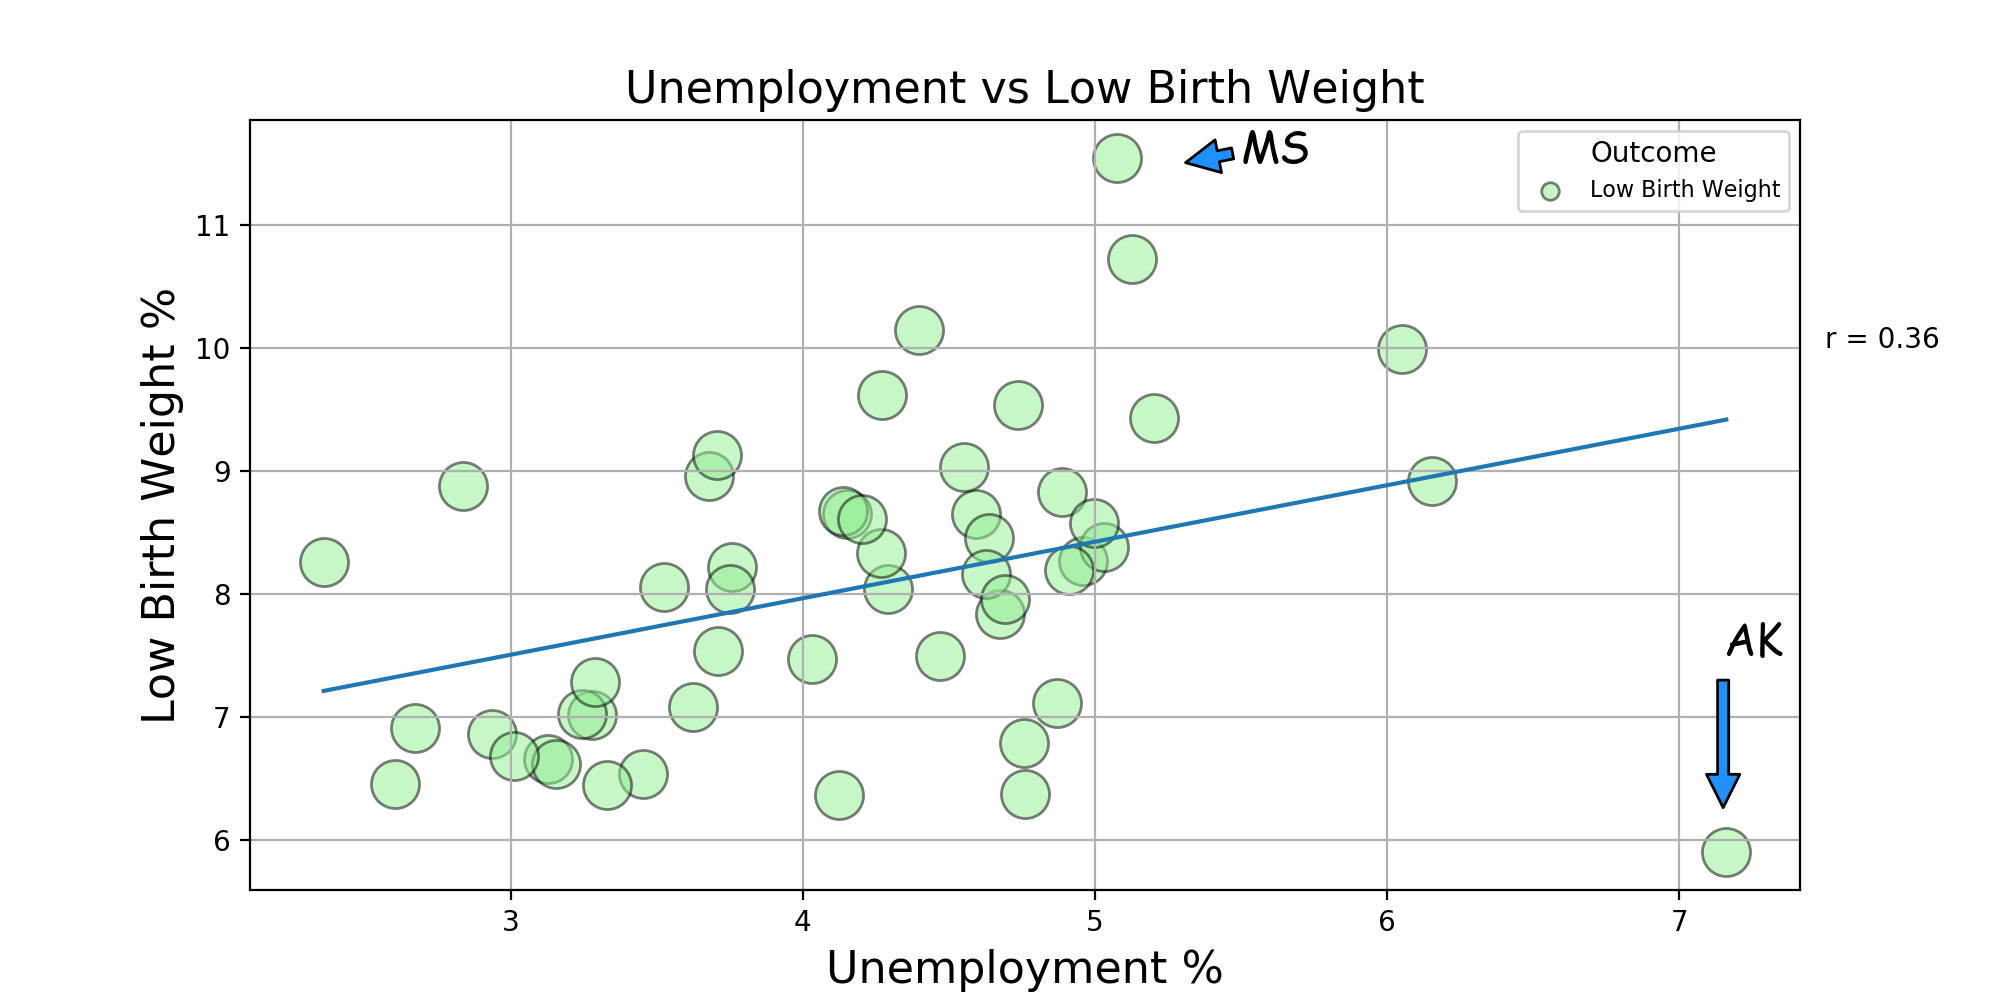

In [49]:
# Plotting Unemployment vs Low Birth Weight scatter plot
plt.figure(figsize=(10,5))
y_limit = 0.01
x_limit = 0.1

# Building Scatter Plot
plt.scatter(x_axis2, y_axis2,s=300, label = "Low Birth Weight", color=["lightgreen"], edgecolor="black", alpha = 0.5, marker="o"         )
plt.grid()

# Best fitted line
plt.plot(np.unique(x_axis2), np.poly1d(np.polyfit(x_axis2, y_axis2, 1))(np.unique(x_axis2)))

# Annotating Outlierts
plt.annotate('AK',fontname="Comic Sans MS", fontsize =16, xy=(7.15, 6.2), xytext=(7.15, 7.5),
            arrowprops=dict(facecolor='dodgerblue', shrink=0.05))

plt.annotate('MS',fontname="Comic Sans MS", fontsize =16, xy=(5.3, 11.5), xytext=(5.5, 11.5),
            arrowprops=dict(facecolor='dodgerblue', shrink=0.05))

# Annotating correlation
plt.text(7.5,10, f"r = {unemp_lowbw_corr}", fontsize = 10)

# Create a legend
legend = plt.legend(fontsize = 8, title= "Outcome", loc="best") 
legend.legendHandles[0]._sizes = [40]

# Plot labels

plt.title("Unemployment vs Low Birth Weight", size=16)
plt.xlabel("Unemployment %", size=16)
plt.ylabel("Low Birth Weight %", size=16)

plt.show()


plt.savefig("Images_RChounoune/Unemployment vs Low Birth Weight")

In [13]:
# Opening original datasetCSV with list of all counties
data = "Data_RChounoune/original_dataset.csv"
datadf = pd.read_csv(data)
datadf = datadf[['fipscode', 'v023_rawvalue']]
datadf2 = datadf.rename(index=str, columns={"v023_rawvalue": "unemployement%"})
all_states = datadf2.iloc[1:]

In [28]:
# Plotting US Map of Unemployment rate per counties

plotly.tools.set_credentials_file(username='rchounoune', api_key =py_key)

colorscale = ["#4B8BBE","#CCE0FF","#66A3FF", "#CC2336"]


endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = all_states['fipscode'].tolist()
values = round(all_states["unemployement%"]*100,2).tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=True,
    
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
)
py.iplot(fig, filename='Unemployment.png')
# pio.write_image(fig, 'Unemployment.png')

The draw time for this plot will be slow for all clients.
